In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install tidytext
import tidytext
import nltk
nltk.download('punkt')

# For making word clouds (unsurprisingly)
from wordcloud import WordCloud, STOPWORDS

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.6/208.6 kB 2.5 MB/s eta 0:00:00
  Created wheel for tidytext: filename=tidytext-0.0.1-py3-none-any.whl size=3870 sha256=47632eb4f91180218d701b1d7d08e9427bb2453672b19f8821355240adc3c826
  Stored in directory: /root/.cache/pip/wheels/88/40/40/04f8d22d7729547afa13c2cbffb494737351dd4465f2f26288
Successfully built tidytext


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
text = """When day comes, we ask ourselves, where can we find light in this never-ending shade?
The loss we carry. A sea we must wade.
We braved the belly of the beast.
We’ve learned that quiet isn’t always peace, and the norms and notions of what “just” is isn’t always justice.
And yet the dawn is ours before we knew it.
Somehow we do it.
Somehow we weathered and witnessed a nation that isn’t broken, but simply unfinished.
We, the successors of a country and a time where a skinny Black girl descended from slaves and raised by a single mother can dream of becoming president, only to find herself reciting for one.
And, yes, we are far from polished, far from pristine, but that doesn’t mean we are striving to form a union that is perfect.
We are striving to forge our union with purpose.
To compose a country committed to all cultures, colors, characters and conditions of man.
And so we lift our gaze, not to what stands between us, but what stands before us.
We close the divide because we know to put our future first, we must first put our differences aside.
We lay down our arms so we can reach out our arms to one another.
We seek harm to none and harmony for all.
Let the globe, if nothing else, say this is true.
That even as we grieved, we grew.
That even as we hurt, we hoped.
That even as we tired, we tried.
That we’ll forever be tied together, victorious.
Not because we will never again know defeat, but because we will never again sow division.
Scripture tells us to envision that everyone shall sit under their own vine and fig tree, and no one shall make them afraid.
If we’re to live up to our own time, then victory won’t lie in the blade, but in all the bridges we’ve made.
That is the promise to glade, the hill we climb, if only we dare.
It’s because being American is more than a pride we inherit.
It’s the past we step into and how we repair it.
We’ve seen a force that would shatter our nation, rather than share it.
Would destroy our country if it meant delaying democracy.
And this effort very nearly succeeded.
But while democracy can be periodically delayed, it can never be permanently defeated.
In this truth, in this faith we trust, for while we have our eyes on the future, history has its eyes on us.
This is the era of just redemption.
We feared at its inception.
We did not feel prepared to be the heirs of such a terrifying hour.
But within it we found the power to author a new chapter, to offer hope and laughter to ourselves.
So, while once we asked, how could we possibly prevail over catastrophe, now we assert, how could catastrophe possibly prevail over us?
We will not march back to what was, but move to what shall be: a country that is bruised but whole, benevolent but bold, fierce and free.
We will not be turned around or interrupted by intimidation because we know our inaction and inertia will be the inheritance of the next generation, become the future.
Our blunders become their burdens.
But one thing is certain.
If we merge mercy with might, and might with right, then love becomes our legacy and change our children’s birthright.
So let us leave behind a country better than the one we were left.
Every breath from my bronze-pounded chest, we will raise this wounded world into a wondrous one.
We will rise from the golden hills of the West.
We will rise from the windswept Northeast where our forefathers first realized revolution.
We will rise from the lake-rimmed cities of the Midwestern states.
We will rise from the sun-baked South.
We will rebuild, reconcile, and recover.
And every known nook of our nation and every corner called our country, our people diverse and beautiful, will emerge battered and beautiful.
When day comes, we step out of the shade of flame and unafraid.
The new dawn balloons as we free it.
For there is always light, if only we’re brave enough to see it.
If only we’re brave enough to be it."""

In [ ]:
dictionary = {"text":[text]}
data = pd.DataFrame(dictionary)

df = tidytext.unnest_tokens(data,"word","text")
df

,word
0,when
0,day
0,comes
0,we
0,ask
...,...
0,brave
0,enough
0,to
0,be


In [ ]:
df["word"].value_counts() #"stop words" (like the we and) dont hold much value by themselves
                          #they wont be the top of newspaper headlines and are also super context
                          #dependent, so just removing them is tricky

we          60
the         29
and         25
to          21
our         18
            ..
tells        1
envision     1
everyone     1
sit          1
see          1
Name: word, Length: 340, dtype: int64

In [ ]:
my_stop = list(STOPWORDS)
my_stop.append("’")
my_stop.append("t")
my_stop.append("re")
my_stop.remove("we")

<Axes: xlabel='index', ylabel='word'>

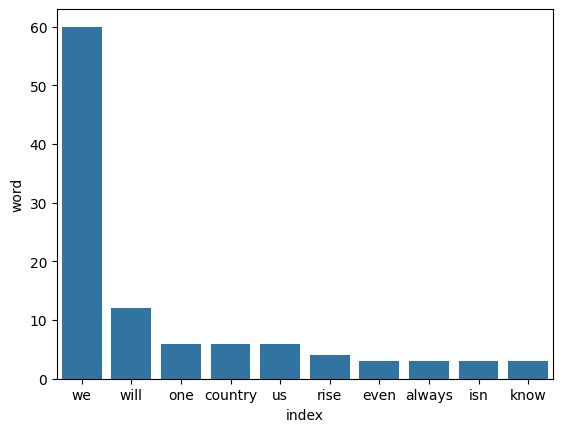

In [ ]:
#We wanna compare the list of stop words to the list of words in the text

df = df.loc[~df["word"].isin(my_stop)  ] #adding a ~ gives all the inverse, so instead of showing all
                                      #instances of stopwords, it shows instances of not stopwords

df["word"].value_counts() #python still kept the quotation mark character, we need to fix this

counts = df["word"].value_counts()[0:10]
counts = counts.reset_index()
counts.head(2)

sns.barplot(counts,x = "index", y = "word")

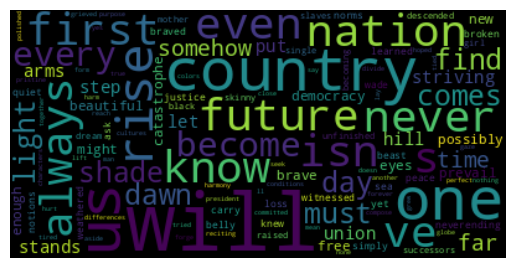

In [ ]:
newtext = " ".join(df["word"])

# I copied all of this from the WordCloud documentation.
# See the link above for options about shape, color, number of words, and so on.
cloud = WordCloud().generate(newtext)
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()